In [136]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
### '01-06 SOUID: Source identifier\n',
  # '08-15 DATE : Date YYYYMMDD\n',
  # '17-21 TG   : mean temperature in 0.1 &#176;C\n',
  # "23-27 Q_TG : Quality code for TG (0='valid'; 1='suspect'; 9='missing')\n",

In [76]:
df = pd.read_csv('TG_STAID002759.txt')

In [77]:
df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [78]:
df.shape

(52777, 4)

In [57]:
df.describe()

,SOUID,DATE,TG,Q_TG
count,52777.000000,5.277700e+04,52777.000000,52777.000000
mean,119444.577752,1.947817e+07,56.462758,0.033272
std,8024.600928,4.171368e+05,617.384226,0.546073
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,111448.000000,1.912022e+07,33.000000,0.000000
50%,111448.000000,1.948040e+07,93.000000,0.000000
75%,127488.000000,1.984052e+07,157.000000,0.000000
max,128124.000000,2.020063e+07,305.000000,9.000000


In [79]:
df = df.rename(columns={" SOUID": "Identifier", "    DATE": "Date","   TG": "Temp", " Q_TG": "Quality"})

In [80]:
df.columns

Index(['Identifier', 'Date', 'Temp', 'Quality'], dtype='object')

In [88]:
df[('Datetime')]=pd.to_datetime(df['Date'], format='%Y%m%d')

In [89]:
df

,Identifier,Date,Temp,Quality,Datetime
0,127488,18760101,22,0,1876-01-01
1,127488,18760102,25,0,1876-01-02
2,127488,18760103,3,0,1876-01-03
3,127488,18760104,-58,0,1876-01-04
4,127488,18760105,-98,0,1876-01-05
...,...,...,...,...,...
52772,111448,20200626,226,0,2020-06-26
52773,111448,20200627,250,0,2020-06-27
52774,111448,20200628,224,0,2020-06-28
52775,111448,20200629,196,0,2020-06-29


In [90]:
df.drop(['Date'], axis = 1 )
df.head(3)

,Identifier,Date,Temp,Quality,Datetime
0,127488,18760101,22,0,1876-01-01
1,127488,18760102,25,0,1876-01-02
2,127488,18760103,3,0,1876-01-03


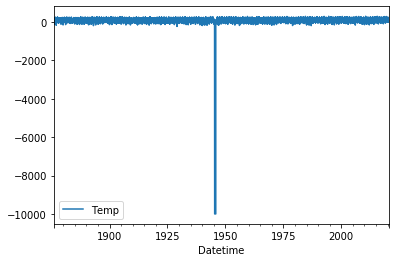

In [91]:
df.plot(y=['Temp'], x='Datetime')

In [93]:
df = df.loc[df['Temp'] > -800]

In [99]:
df.head(3)

,Identifier,Date,Temp,Quality,Datetime,month
0,127488,18760101,22,0,1876-01-01,1
1,127488,18760102,25,0,1876-01-02,1
2,127488,18760103,3,0,1876-01-03,1


In [102]:
df['month'] = pd.to_datetime(df['Datetime']).dt.month
df['year'] = pd.to_datetime(df['Datetime']).dt.year
df.head(3)

/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Identifier,Date,Temp,Quality,Datetime,month,year
0,127488,18760101,22,0,1876-01-01,1,1876
1,127488,18760102,25,0,1876-01-02,1,1876
2,127488,18760103,3,0,1876-01-03,1,1876


In [124]:
df.shape

(52582, 7)

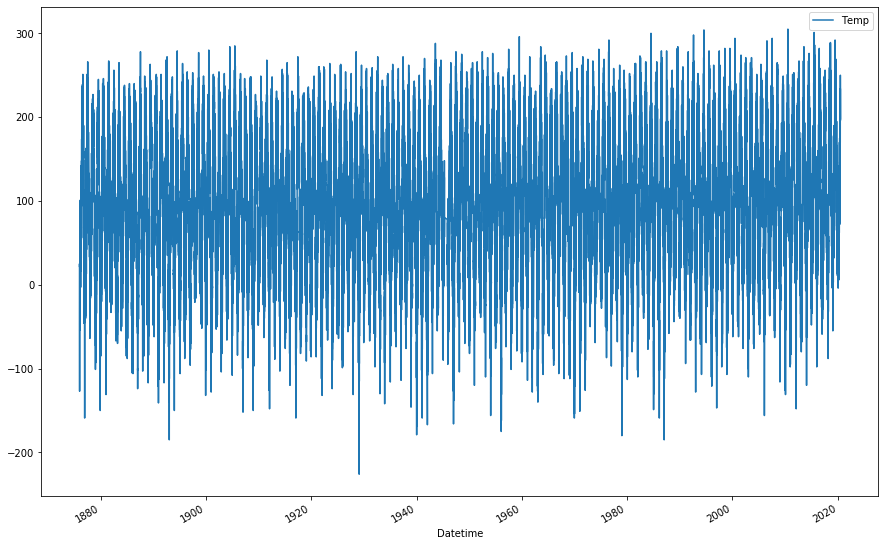

In [121]:
df.plot(y=['Temp'], x='Datetime',figsize=(15,10))

In [139]:
# Considering years from 1946 (1945: strong observations)
df = df[df['year'] > 1946]
df.set_index('Datetime', inplace=True)

In [140]:
df

,Identifier,Temp,Quality,month,year
Datetime,,,,,
1947-01-01,128124,-24,0,1,1947
1947-01-02,128124,-35,0,1,1947
1947-01-03,128124,-45,0,1,1947
1947-01-04,128124,-127,0,1,1947
1947-01-05,128124,-150,0,1,1947
...,...,...,...,...,...
2020-06-26,111448,226,0,6,2020
2020-06-27,111448,250,0,6,2020
2020-06-28,111448,224,0,6,2020


In [134]:
## Grouping by year:
df2 = df.groupby('year')['Temp'].mean()

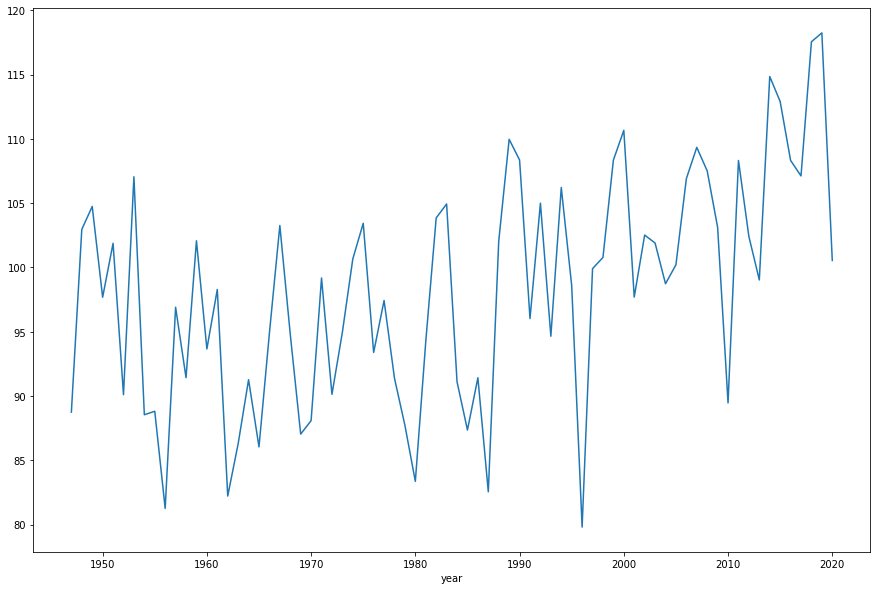

In [135]:
df2.plot(figsize=(15,10))